In [391]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import math
import time
import random
import nltk
import math
import statsmodels.api as sm
import datetime
#nltk.download()
#from nltk.stem.wordnet import WordNetLemmatizer as lmtzr
from nltk.stem import SnowballStemmer

#magic!
%matplotlib inline


#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
import csv

#http://www.tweepy.org/
import tweepy

#Get your Twitter API credentials and enter them here
consumer_key = 
consumer_secret = 
access_key = 
access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [405]:
#Test function to get more data
screen_name = 'grahamclark'
number_of_tweets=200
newtweets = api.user_timeline(screen_name = screen_name,count = number_of_tweets,exclude_replies=True,include_rts=False)
WOEID = 1
#WOEID = Where on earth id
#WOEID = 1 means global
trends = api.trends_place(id = WOEID)

In [435]:
#More tweets
#print newtweets[0].created_at
#print newtweets[0].text
#print newtweets[0]
#trends[0]


#>>> import datetime
#>>> datetime.datetime.today()
#datetime.datetime(2012, 3, 23, 23, 24, 55, 173504)
#>>> datetime.datetime.today().weekday()

True
56


In [ ]:
#create dictionary of tweet information:
tweets_dict = [{'screen_name':tweet.author.screen_name.encode("utf-8"), 'id':tweet.id,  'favorite_count':tweet.favorite_count, 
                    'retweet_count':tweet.retweet_count, 'created_at':tweet.created_at, 
                    'text':tweet.text.encode("utf-8"),'followers_count':tweet.author.followers_count
                } for tweet in newtweets]

Plan to Get More Data:
Age of tweet                      
Day of week of tweet
Weekend or Weekday
Length of tweet
Is the tweet @ someone? 

Who is the tweet @?
Is tweet at one of the followers?

Tweet includes a trending topic?

Get tweets over time. Many tweets.




In [23]:
#Define Methods


#Get all available tweets from user with screen_name = username
#Assumes user's tweets are not protected
#Makes up to 16 requests to api.user_timeline()
#Returns a dataframe
def get_tweets(username):

    #http://tweepy.readthedocs.org/en/v3.1.0/getting_started.html#api
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    #set count to however many tweets you want; twitter only allows 200 at once
    number_of_tweets = 200
    
    #get tweets
    newtweets = api.user_timeline(screen_name = username,count = number_of_tweets,exclude_replies=True,include_rts=False)
    
    #create dictionary of tweet information:
    tweets_dict = [{'screen_name':tweet.author.screen_name.encode("utf-8"), 'id':tweet.id,  'favorite_count':tweet.favorite_count, 
                    'retweet_count':tweet.retweet_count, 'created_at':tweet.created_at, 
                    'text':tweet.text.encode("utf-8"),'followers_count':tweet.author.followers_count
                   } for tweet in newtweets]
    
    while len(newtweets) > 0:
        oldest = newtweets[len(newtweets)-1].id  #id of oldest tweet so far
        newtweets = api.user_timeline(screen_name = username,count = number_of_tweets,exclude_replies=True,include_rts=False, max_id = oldest - 1)
        tweets_dict.extend([{'screen_name':tweet.author.screen_name.encode("utf-8"), 'id':tweet.id,  'favorite_count':tweet.favorite_count, 
                    'retweet_count':tweet.retweet_count, 'created_at':tweet.created_at, 
                    'text':tweet.text.encode("utf-8"),'followers_count':tweet.author.followers_count
                            } for tweet in newtweets])

    return pd.DataFrame(tweets_dict)


#Get all available tweets from user with given user_id 
#Assumes user's tweets are not protected
#Makes up to 16 requests to api.user_timeline()
#Returns a dataframe
def get_tweets_by_user_id(user_id):

    #http://tweepy.readthedocs.org/en/v3.1.0/getting_started.html#api
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    #set count to however many tweets you want; twitter only allows 200 at once
    number_of_tweets = 200
    
    #get tweets
    newtweets = api.user_timeline(user_id=user_id,count = number_of_tweets,exclude_replies=True,include_rts=False)
    
    #create dictionary of tweet information:
    tweets_dict = [{'screen_name':tweet.author.screen_name.encode("utf-8"), 'id':tweet.id,  'favorite_count':tweet.favorite_count, 
                    'retweet_count':tweet.retweet_count, 'created_at':tweet.created_at, 
                    'text':tweet.text.encode("utf-8"),'followers_count':tweet.author.followers_count
                   } for tweet in newtweets]
    
    
    #Note: If a user makes 200 replies or retweets in a row, newtweets will be empty even if there are more tweets. Unlikely.
    while len(newtweets) > 0:
        oldest = newtweets[len(newtweets)-1].id  #id of oldest tweet so far
        newtweets = api.user_timeline(user_id=user_id,count = number_of_tweets,exclude_replies=True,include_rts=False, max_id = oldest - 1)
        tweets_dict.extend([{'screen_name':tweet.author.screen_name.encode("utf-8"), 'id':tweet.id,  'favorite_count':tweet.favorite_count, 
                    'retweet_count':tweet.retweet_count, 'created_at':tweet.created_at, 
                    'text':tweet.text.encode("utf-8"),'followers_count':tweet.author.followers_count
                            } for tweet in newtweets])
        

    return pd.DataFrame(tweets_dict)
        
        
#Superfriend of user =  follower of user who is also followed by (i.e., friend of) user
#Get all superfriends of user with screen_name = username
#Assumes user's tweets are not protected
#Exceeds rate limit if user has many (>180) friends
#Returns list of user_ids
def get_superfriends(username):
    #http://tweepy.readthedocs.org/en/v3.1.0/getting_started.html#api
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    friends = api.friends_ids(screen_name = username) #list of ids being followed by username
    
    #user_a='HillaryClinton'
    #user_b='khamdev'
    #relationship = api.show_friendship(source_screen_name=user_a,target_screen_name=user_b)

    #print relationship[0].followed_by   #source is followed by target
    #print relationship[0].following     #source is following source

    #print relationship[1].followed_by   #target is followed by source
    #print relationship[1].following     #target is following source

    superfriends = [] #list of ids that are both followed by and following username
    for friend in friends:
        if api.show_friendship(source_screen_name=username,target_id=friend)[0].followed_by:
            superfriends.append(friend)
            
    return superfriends

#Get n random followers of user, out of the 5000 most recent followers. 
#If user has less than n followers, then get all followers????
#Return list of user_ids
def get_random_followers(username,n):
    #http://tweepy.readthedocs.org/en/v3.1.0/getting_started.html#api
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    return random.sample(api.friends_ids(screen_name = username),n)

#input: string
#output: list of stems
def process_text(string):
    tokens = nltk.word_tokenize(string.decode("utf-8"))
    ss=SnowballStemmer("english")
    n=len(tokens)
    for i in range(0,n):
        tokens[i] = ss.stem(tokens[i]).encode("utf-8")
    return tokens

def whatisthis(s):
    if isinstance(s, str):
        print "ordinary string"
    elif isinstance(s, unicode):
        print "unicode string"
    else:
        print "not a string"

#input: lst = list of strings, stem = string
#output: number of times stem appears in lst
def number_of_stem(lst,stem):
    count = 0
    for s in lst:
        if s == stem:
            count  = count + 1
    return count
    

In [24]:
#Build a dataframe of all retrievable tweets made by username and n random followers of username

username = 'grahamclark'
df = get_tweets(username)
number_of_followers = 0
random_followers = get_random_followers(username,number_of_followers)
for follower in random_followers:
    if not api.get_user(user_id=follower).protected:
        #df = df.append(get_tweets_by_user_id(user_id=follower))
        df = pd.concat([df,get_tweets_by_user_id(user_id=follower)],
                       axis=0,ignore_index=True)

In [74]:
#For each tweet, process text into a list of stems
#Count number of each stem to build stem frequency table
ft = {}
df['stem_list'] = np.repeat([''],len(df))
for i in range(0,len(df)):
    #print i
    df.at[i,'stem_list'] = process_text(df.at[i,'text'])
    for stem in df.at[i,'stem_list']:
        if stem in ft:
            ft[stem] = ft[stem] + 1
        else:
            ft[stem] = 1

In [116]:
#Build a dictionary of the most common stems in the captured tweets
#Only include the stem if it #occurances > threshold

threshold = 20
ft_top = {k:v for (k,v) in ft.items() if v > threshold}

In [117]:
#Add new covariates

#df.at[i,'prop stem'] = proportion of stems in tweet i equal to 'stem'
for stem in ft_top:
    s='prop ' + stem
    df[s] = np.repeat(0.0,len(df))
    for i in range(0,(len(df))):
        df.at[i,s] = (number_of_stem(df.at[i,'stem_list'],stem)+0.0)/len(df.at[i,'stem_list'])
        
#df['number_of_stems'] = number of stems/words in the tweet
df['number_of_stems']=np.repeat(0.0,len(df))
for i in range(0,len(df)):
    df.at[i,'number_of_stems'] = len(df.at[i,'stem_list'])
    
#df['relative_length'] = number of characters / 140
df['relative_length'] = np.repeat(0.0,len(df))
for i in range(0,len(df)):
    df.at[i,'relative_length'] = len(df.at[i,'text']) / 140
    
#df['proportion_of_capitals'] = number of uppercase / number of characters
df['proportion_of_capitals'] = np.repeat(0.0,len(df))
for i in range(0,len(df)):
    df.at[i,'proportion_of_capitals'] = sum(1 for c in df.at[i,'text'] if c.isupper()) / len(df.at[i,'text'])

#df['number_of_@'] normalized
df['number_of_@'] = np.repeat(0.0,len(df))
for i in range(0,len(df)):
    df.at[i,'number_of_@'] = sum(1 for c in df.at[i,'text'] if c == '@') / len(df.at[i,'text'])

#print "!!" in newtweets[20].text.encode('utf-8')
#print len(newtweets[20].text.encode('utf-8'))
    

In [ ]:
#Add new covariates
#age_of_tweet in days, rounded down, normalized to be between 0 and 1
df['age_of_tweet'] = np.repeat(0.0,len(df))
max = 0
for i in range(0,len(df)):
    df.at[i,'age_of_tweet'] = (datetime.datetime.today()-df.at[i,'created_at']).days
    if df.at[i,'age_of_tweet'] > max:
        max = df.at[i,'age_of_tweet']
for i in range(0,len(df)):
    df.at[i,'age_of_tweet'] = (datetime.datetime.today()-df.at[i,'created_at']).days/max
    

#day of week tweet was made
df['day_of_week']=np.repeat(0.0,len(df))
for i in range(0,len(df)):
    df.at[i,'day_of_week'] = (df.at[i,'created_at'].weekday()+0.0)/6
    #day of the week as an integer, where Monday is 0 and Sunday is 6.
    #then normalize to be between 0 and 1
    
#df['weekend_tweet'] = 1 if tweet made on saturday or sunday, 0 otherwise
df['weekend_tweet']=np.repeat(0.0,len(df))
for i in range(0,len(df)):
    if df.at[i,'created_at'].weekday() >= 5:
        df.at[i,'weekend_tweet'] = 1

In [118]:
#Add new covariates
#df.at[i,'likes_per_follower'] = proportion of followers that like tweet i
df['likes_per_follower'] = np.repeat(0.0,len(df))
for i in range(0,len(df)):
    df.at[i,'likes_per_follower'] = (df.at[i,'favorite_count']+0.0)/df.at[i,'followers_count']

In [281]:
#target variable
#target =  1 if likes per follower greater than average
#target =  0 if likes per follower less than average
df['target'] = np.repeat(0.0,len(df))
for i in range(0,len(df)):
    lpf = df.at[i,'likes_per_follower']
    avglpf = df['likes_per_follower'].mean()
    df.at[i,'target'] = math.ceil( ( math.floor( lpf / avglpf )+0.0) / 1000)


### p = 'likes_per_follower' + 0.5
### target = logit(p) = log(p/(1-p))
#df['target'] = np.repeat(0.0,len(df))
#for i in range(0,len(df)):
 #   df.at[i,'target'] = math.log((df.at[i,'likes_per_follower']+0.5)/(1-df.at[i,'likes_per_follower']-0.5))

variables checklist:
target = number of likes per follower = probability that a follower will like <3
number of words (or stems) <3
For each stem: proportion (or number) of stems in text equal to that stem <3
Go through all the tweets gathered, count the different stems  <3

## Model Fitting: Make Training and Testing Set

In [282]:
#Split data into training and testing set

from sklearn import cross_validation as cv

#list of covariates
df['intercept']=np.repeat(1.0,len(df))
lstcov = ['intercept']
#lstcov=[]
for stem in ft_top:
    lstcov.append('prop ' + stem)
X=df[lstcov]
Y=df['target']

X_train, X_test, Y_train, Y_test = cv.train_test_split(
    X, Y, test_size=0.2, random_state=0)

## Model Fitting: Logistic Regression - sklearn

In [283]:
#logistic regression
#sklearn

from sklearn.linear_model import LogisticRegression as LOGR
logr = LOGR(fit_intercept=False,C=1.0)
logr.fit( X_train, Y_train )
pred=logr.predict(X_test)

print "mean accuracy:", logr.score(X_test,Y_test)


##convert to numpy matrix
from scipy.special import logit
Xmat = np.matrix(X_train.values)
betahat = np.matrix(logr.coef_[0]).T
ymat = np.matrix(logit(Y_train.values)).T
print Xmat.shape, betahat.shape, ymat.shape
NN = Xmat.shape[0]
pp = Xmat.shape[1] - 1

##predict probabilities
from scipy.special import expit
sklearn_logit_pred_prob= expit(Xmat*betahat)    #same as: logr.predict_proba(X_train)

# cc = dataframe of coefficients with their parameters and p-value
cc = DataFrame()
cc['covariates'] = lstcov
cc['coefficients'] = logr.coef_[0]

print'coefficients:'
print cc

mean accuracy: 0.620071684588
(1113L, 165L) (165L, 1L) (1113L, 1L)
coefficients:
       covariates  coefficients
0       intercept     -0.660260
1        prop all      0.418883
2     prop comedi      0.070222
3       prop just      0.300991
4       prop show     -0.083295
5       prop veri     -0.236700
6         prop go      0.305853
7       prop hate      0.263083
8       prop onli      0.120690
9          prop (      0.039026
10     prop tweet     -0.490151
11      prop movi     -0.268473
12       prop had      0.107504
13         prop ,     -0.035966
14    prop should      0.064266
15        prop to      0.584320
16       prop has     -0.054965
17      prop real     -0.059245
18         prop @     -1.129563
19      prop good     -0.116695
20       prop get      0.049880
21      prop stop      0.021161
22     prop dandi     -0.262756
23      prop know      0.518085
24      prop they      0.061664
25       prop new      0.102477
26       prop not     -0.000333
27       prop now     -

## Model Fitting: Logistic Regression - statsmodels.discrete.discrete_model.Logit

In [284]:
import statsmodels.api as sm
from numpy.linalg import det, matrix_rank
logit = sm.Logit(Y_train,X_train,missing='none')
fitted_logit = logit.fit_regularized(alpha=1)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.623680520765
            Iterations: 155
            Function evaluations: 155
            Gradient evaluations: 155


In [285]:
statsmodel_logit_pred_prob=fitted_logit.predict(X_train)
#print fitted_logit.predict(X_test)
print fitted_logit.summary()

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1113
Model:                          Logit   Df Residuals:                     1100
Method:                           MLE   Df Model:                           12
Date:                Tue, 19 Jul 2016   Pseudo R-squ.:                 0.06429
Time:                        18:24:42   Log-Likelihood:                -665.46
converged:                       True   LL-Null:                       -711.18
                                        LLR p-value:                 2.588e-14
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
intercept        -0.6759      0.145     -4.656      0.000        -0.960    -0.391
prop all               0        nan        nan        nan           nan       nan
prop comedi            0        nan     

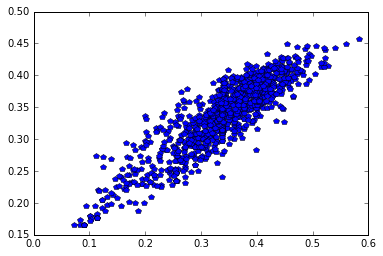

In [286]:
plt.plot(statsmodel_logit_pred_prob,sklearn_logit_pred_prob,"p")

## Model Fitting: Logistic Regression - statsmodels.GLM

In [287]:

glm_binom = sm.GLM(Y_train,X_train, family=sm.families.Binomial())
fitted_glm_binom = glm_binom.fit()
print(fitted_glm_binom.summary())
statsmodel_glm_binom_pred_prob=fitted_glm_binom.predict(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                 1113
Model:                            GLM   Df Residuals:                      951
Model Family:                Binomial   Df Model:                          161
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -528.98
Date:                Tue, 19 Jul 2016   Deviance:                       1058.0
Time:                        18:24:45   Pearson chi2:                 1.09e+03
No. Iterations:                    24                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
intercept        -1.3519      0.523     -2.584      0.010        -2.377    -0.327
prop all          5.3018      3.946      1.

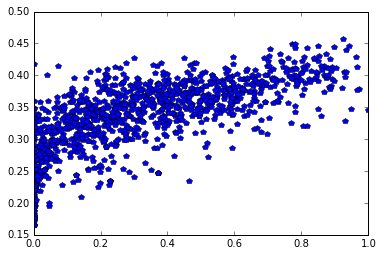

In [288]:
plt.plot(statsmodel_glm_binom_pred_prob,sklearn_logit_pred_prob,"p")

## Model Fitting: sklearn.ensemble.RandomForestClassifier

In [304]:
from sklearn.ensemble import RandomForestClassifier as RFC
forest = RFC(n_estimators=1000, criterion='gini', max_depth=10, min_samples_split=2, 
             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
             max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, 
             verbose=0, warm_start=False, class_weight=None)
fitted_forest = forest.fit(X_train, Y_train, sample_weight=None)

## Model Fitting: sklearn.ensemble.GradientBoostingClassifier

In [358]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
gboost = GBC(loss='deviance', learning_rate=0.01, n_estimators=2000, subsample=1.0, min_samples_split=2, 
             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=20, init=None, random_state=None, 
             max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
fitted_gboost = gboost.fit(X_train, Y_train, sample_weight=None, monitor=None)

## Model Fitting: sklearn.ensemble.ExtraTreesClassifier

In [387]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=2000, criterion='gini', max_depth=20, min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=False, 
                             oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
fitted_xtree = xtree.fit(X_train, Y_train, sample_weight=None)

## Model Evaluation

In [289]:
def labels(y):
    for i in range(0,len(y)):
        y[i]=round(y[i],0)
    return y
def mean_square_error(y,yhat):
    #import statistics
    n = y.shape[1]
    return ((y-yhat) * (y-yhat).T)/n

In [388]:
Y_test_mat = np.matrix(Y_test.values)
naive_pred_0 = np.matrix(np.repeat(0.0,len(Y_test.values)))
naive_pred_1 = np.matrix(np.repeat(1.0,len(Y_test.values)))

print 'naive 0:', mean_square_error(Y_test_mat,naive_pred_0)
print 'naive 1:', mean_square_error(Y_test_mat,naive_pred_1)
print 'sklearn pred mse:', mean_square_error(Y_test_mat,np.matrix(logr.predict(X_test)))
print 'sm glm pred mse:', mean_square_error(Y_test_mat,np.matrix(labels(fitted_glm_binom.predict(X_test))))
print 'sklearn rfclf mse:', mean_square_error(Y_test_mat,np.matrix(fitted_forest.predict(X_test)))
print 'sklearn gboostclf mse:', mean_square_error(Y_test_mat,np.matrix(fitted_gboost.predict(X_test)))
print 'sklearn xtree mse:', mean_square_error(Y_test_mat,np.matrix(fitted_xtree.predict(X_test)))


naive 0: [[ 0.37992832]]
naive 1: [[ 0.62007168]]
sklearn pred mse: [[ 0.37992832]]
sm glm pred mse: [[ 0.40501792]]
sklearn rfclf mse: [[ 0.38351254]]
sklearn gboostclf mse: [[ 0.390681]]
sklearn xtree mse: [[ 0.37634409]]


# Old Code

In [ ]:
#df = get_tweets('HillaryClinton')
#plt.plot(df["retweet_count"],'r')
#plt.show()

#username = 'HillaryClinton'
#print api.friends_ids(screen_name = username)
#friends = api.friends_ids(screen_name = username)
#print len(friends)

#superfriends = get_superfriends(username)
#print len(superfriends)

#friend = 75187482
#print api.show_friendship(source_screen_name=username,target_id=friend)[0].followed_by
#print api.friends_ids(user_id = friend)
#print api.followers_ids(user_id = friend)

#print api.user_timeline(screen_name=username,count=1)[0].id
#print 'abc'.decode('utf-8')  #string to unicode
#print u'abc'.encode('utf-8') #unicode to string
#df = get_tweets('HillaryClinton')
#friends = api.friends_ids(screen_name = username) #list of ids being followed by username
#api.rate_limit_status()
#df



# Build Database


#api.get_user(screen_name='HillaryClinton').id
#api.get_user(user_id=1339835893).screen_name
#api.get_user(user_id=1339835893).screen_name.encode("utf-8")



#n = math.trunc(math.ceil(len(friends)/180.0))

#for friend in friends[0:100]:
 #   print friend
 #   #username = api.get_user(user_id=friend).screen_name.encode("utf-8")
 #   user = api.get_user(user_id=friend)
 #   if not user.protected
 #   df = df.append(get_tweets_by_id(friend))
    

#for i in range(0, n):
 #   for friend in friends[(180*i):(180*(i+1))]:
  #      username = api.get_user(user_id=friend).screen_name.encode("utf-8")
   #     df = df.append(get_tweets(username))
    #time.sleep((60*15) + 1)

#for friend in friends:
 #   username = api.get_user(user_id=friend).screen_name.encode("utf-8")
  #  df = df.append(get_tweets(username))



#friend = 75187482
#print api.get_user(user_id=friend).screen_name.encode("utf-8")
#print api.get_user(user_id=friend).protected
#get_tweets( api.get_user(user_id=friend).screen_name.encode("utf-8") )

In [345]:
#fit linear regression
from sklearn.linear_model import LinearRegression as LR
linr = LR()
linr.fit( X_train, Y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [346]:
pred=linr.predict(X_test)
diff_of_squares = (pred - Y_test)**2
print "sum of difference of squares = sum (Y_pred - Y_true)^2 : "
print diff_of_squares.sum()
print "R^2 : "
print linr.score(X_test,Y_test)

sum of difference of squares = sum (Y_pred - Y_true)^2 : 
0.0212070870156
R^2 : 
-0.260262831829


In [347]:
fig, ax = plt.subplots(Y_test,pred)

ValueError: sequence too large; cannot be greater than 32

<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


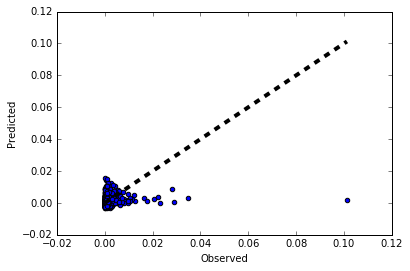

In [350]:
log_Y_test = Y_test.copy()
log_pred = pred.copy()
for i in Y_test.index:
    log_Y_test[i] = math.log(Y_test[i] + 0.1)
for i in range(0,len(log_pred)):
    log_pred[i] = math.log(pred[i] + 0.1)
    
print type(log_Y_test)
print type(log_pred)

fig, ax = plt.subplots()
ax.scatter(Y_test,pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
plt.show()

In [354]:
import statsmodels.api as sm
ols = sm.OLS(Y_train, X_train)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
ols_result.HC0_se
## and covariance estimates
#ols_result.cov_HC0

number_of_stems    0.000033
prop all           0.013219
prop help          0.007474
prop just          0.007117
prop ``            0.011252
prop go            0.006431
prop hillari       0.009413
prop republican    0.010356
prop thank         0.011898
prop -h            0.015034
prop should        0.007149
prop to            0.006609
prop win           0.007774
prop has           0.005593
prop ...           0.011917
prop his           0.006113
prop everi         0.012138
prop get           0.010846
prop they          0.012536
prop not           0.007961
prop amp           0.011557
prop now           0.009107
prop day           0.008924
prop like          0.008298
prop gun           0.016656
prop right         0.006141
prop nmsen         0.015165
prop donald        0.010800
prop are           0.004771
prop year          0.008273
                     ...   
prop and           0.007662
prop want          0.006922
prop do            0.006195
prop is            0.008285
prop it            0

In [356]:
ols_result.summary()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 9277: ordinal not in range(128)